# Graded Challenge 1
Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp assignment.`

In this project, I will try to make a `Machine Learning prediction model` using the concept of `Linear Regression.`

### I.2 Dataset Description

Dataset for this project is made available by [`BM`](https://www.kaggle.com/brllrb), a kaggler from Nebraska, United States. You can check the dataset [here.](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma)

**Content**

**Uber vs Lyft**

It is a good dataset if you want to use a Linear Regression Model to see the pattern between different predectors such as hour and price.

A really amazing part of this dataset is that corresponding weather data is included for that hour with a short summary of the weather. Other important factors are temperature, wind, and sunset.

**Attribute Information**

| Input Parameter | Description                          |
| --------------- | ------------------------------------ |
| id              | Unique Identifier for each column    |
| timestamp       | Unix Timestamp                       |
| hour            | Hour of the day                      |
| day             | Day of the week                      |
| month           | Month in a year                      |
| datetime        | Date value                           |
| timezone        | Timezone                             |
| source          | Initial source of the ride           |
| destination     | Destination of the ride              |
| cab\_type       | The type of cab                      |
| distance        | Total distance of the requested ride |
--------------  ------------------------------------ 

| Target Parameter | Description       |
| ---------------- | ----------------- |
| price            | Price of the ride |


**Usage Information**

License : [`CC0: Public Domain`](https://creativecommons.org/publicdomain/zero/1.0/)

### I.3 Objectives

Main objectives for this project are:
- Implement `Linear Regression` in `Machine Learning prediction model.`
- Predict `price` value based on trained prediction model

## II. Import Libraries

In [100]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## III. Data Loading


In [101]:
# Load Data and save it in `df_og` variable
df_og = pd.read_csv('rideshare_kaggle.csv', parse_dates=['datetime'])

# Make copy from the df
df = df_og.copy()

In [102]:
# Show the dataset
pd.set_option('display.max.columns', None)

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [103]:
# Dataset Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [104]:
# Dataset Shape
df.shape

(693071, 57)

The dataset consist of `693071 rows` of entries and `57 columns.`

This sure is one of complete dataset I got here, but sadly our dataset doesn't come with clear `input parameter` description. I will try to figure it out later.

Also, looks like there are some input parameter in `timestamp` data type stored as numerical format. Let's convert it to proper `timestamp` format.

In [105]:
# column with timestamp format list

list_dt = ['timestamp', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime',
                'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'sunriseTime',
                'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
                'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']

In [106]:
# Convert timestamp into proper Dtype

for i in list_dt:
    df[i] = pd.to_datetime(df[i]).dt.strftime('%H:%M:%S')

Now let's check for `null values` count in the dataset. 

In [107]:
# Null value summary
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

looks like our `target parameter` has `null values` in it. I will explore more about this missing value later in the process.

In [108]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
hour,693071.0,11.619137,6.948114,0.0000,12.0000,23.0000
day,693071.0,17.794365,9.982286,1.0000,17.0000,30.0000
month,693071.0,11.586684,0.492429,11.0000,12.0000,12.0000
price,637976.0,16.545125,9.324359,2.5000,13.5000,97.5000
distance,693071.0,2.189430,1.138937,0.0200,2.1600,7.8600
surge_multiplier,693071.0,1.013870,0.091641,1.0000,1.0000,3.0000
latitude,693071.0,42.338172,0.047840,42.2148,42.3519,42.3661
longitude,693071.0,-71.066151,0.020302,-71.1054,-71.0631,-71.0330
temperature,693071.0,39.584388,6.726084,18.9100,40.4900,57.2200
apparentTemperature,693071.0,35.881222,7.918707,12.1300,35.9000,57.2200


For a glance, there is no strange value in our `numerical` input parameter, all values contained in each input parameter is reasonable value.\
I'll explore more in the later process.

## IV. Exploratory Data Analysis

First, because I am not so familiar in this ride hailing realted field, I'll surf the net and search any article regarding `price estimation in ride hailing apps`. I found an article that explain `Lyft’s Revenue Generation Model`

> Lyft is basically a cab aggregator that matches people who want a ride with drivers who have a car. Each transaction happening on Lyft’s technology-based model is divided between the driver and the company. Lyft takes a 20% cut from the total amount paid by a passenger and the rest 80% cut goes to the driver. 

The main revenue models of Lyft include:

- Lyft Car Ride : Lyft charges a 20% cut from every transaction that happens on the platform. Normal 5-seater cars come under the normal “Lyft” car category.
- Heat maps (Surge Pricing) :  define an area where the demand is more. In the case of high demand in a particular area, more price is charged by the cab company.
- Lyft Plus (More seater vehicles) : The charges for Lyft Plus are higher as compared to normal Lyft
- Lyft Line (Discounted Rides) : Promoting car share among people and to give an option to those who do not wish to hire an independent cab, Lyft initiated “Lyft Line”. As the name suggests, it enables a user to ride along with others on a pre-specified route.

For complete articel, here is the source that I look into. [Source](https://jungleworks.com/how-lyft-works-business-model-insights-lyft-revenue/)

It may be biased to use above article as sole `price estimation` model because it is only based on `Lyft` price estimation model. There is high chance that `Uber` use different `price estimation` model.\
Since I played my role here as an `Researcher`, I'll just try to apply my assumption here. Based on the information that I get from above article, I'll assume that
> Features that directly affect `price` target parameter prediction are `service type` and `surge pricing.` Different service type (e.g Lyft car ride, lyft plus, lyft line) tends to have different price.

In [109]:
# Dataframe check
df.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
63427,4868fa99-1551-462a-ab1c-881ed71bf436,00:00:01,21,17,12,2018-12-17 21:30:12,America/New_York,West End,Haymarket Square,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.5,0.72,1.0,42.3505,-71.1054,40.47,35.92,Mostly Cloudy,Light rain in the morning.,0.0000,0.00,0.71,6.64,7.91,00:00:01,9.770,41.44,00:00:01,24.05,00:00:01,36.09,00:00:01,12.30,00:00:01,partly-cloudy-night,31.95,999.95,286,0.76,0,9.770,354.4,00:00:01,00:00:01,0.33,0.0217,00:00:01,34.22,00:00:01,41.44,00:00:01,28.61,00:00:01,36.09,00:00:01
409423,1f3f2fcf-aa2e-499e-8ecb-049b4569995a,00:00:01,7,3,12,2018-12-03 07:43:02,America/New_York,Fenway,West End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,2.72,1.0,42.2148,-71.0330,47.27,47.27,Overcast,Foggy in the morning.,0.0000,0.00,0.95,1.44,1.44,00:00:01,3.188,57.87,00:00:01,32.80,00:00:01,57.20,00:00:01,27.22,00:00:01,cloudy,45.86,1000.81,166,1.00,0,3.188,292.7,00:00:01,00:00:01,0.89,0.0007,00:00:01,42.96,00:00:01,57.87,00:00:01,39.41,00:00:01,57.20,00:00:01
498210,3405d32a-663b-468c-ba04-98f7c89d51b2,00:00:01,8,16,12,2018-12-16 08:05:08,America/New_York,Haymarket Square,Theatre District,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,1.16,1.0,42.3644,-71.0661,39.67,35.00,Partly Cloudy,Rain throughout the day.,0.0000,0.00,0.72,6.57,9.01,00:00:01,10.000,43.74,00:00:01,34.07,00:00:01,38.36,00:00:01,28.17,00:00:01,partly-cloudy-night,31.38,1022.08,51,0.32,0,10.000,302.6,00:00:01,00:00:01,0.30,0.1246,00:00:01,38.88,00:00:01,43.74,00:00:01,33.68,00:00:01,38.36,00:00:01
659320,4e346ae8-9af1-4f97-81f8-356fceb97f63,00:00:01,19,28,11,2018-11-28 19:32:08,America/New_York,Northeastern University,Theatre District,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,19.0,1.91,1.0,42.3503,-71.0810,41.47,35.66,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.63,9.54,14.86,00:00:01,10.000,42.72,00:00:01,37.59,00:00:01,36.75,00:00:01,32.25,00:00:01,cloudy,29.72,991.85,295,1.00,0,10.000,354.2,00:00:01,00:00:01,0.72,0.0000,00:00:01,33.82,00:00:01,42.72,00:00:01,30.19,00:00:01,36.75,00:00:01
560528,d7c2c814-4af8-421f-bfbe-f852a760476c,00:00:01,12,17,12,2018-12-17 12:15:11,America/New_York,Back Bay,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,32.5,2.70,1.0,42.3503,-71.0810,35.01,29.04,Overcast,Light rain in the morning.,0.0009,0.03,0.92,7.13,7.85,00:00:01,8.468,41.51,00:00:01,24.05,00:00:01,36.11,00:00:01,12.12,00:00:01,cloudy,32.88,1004.18,336,1.00,0,8.468,325.5,00:00:01,00:00:01,0.33,0.0183,00:00:01,34.24,00:00:01,41.51,00:00:01,28.43,00:00:01,36.11,00:00:01


Looking into my dataset, input parameter that shows different service type are `'product_id'` & `name`, then `'surge_multiplier'`. For now, I'll just keep in mind that these input parameter might be correlated with `price` target parameter.

Speaking of correlation, Let's take a look correlation between each input parameter and target parameter.

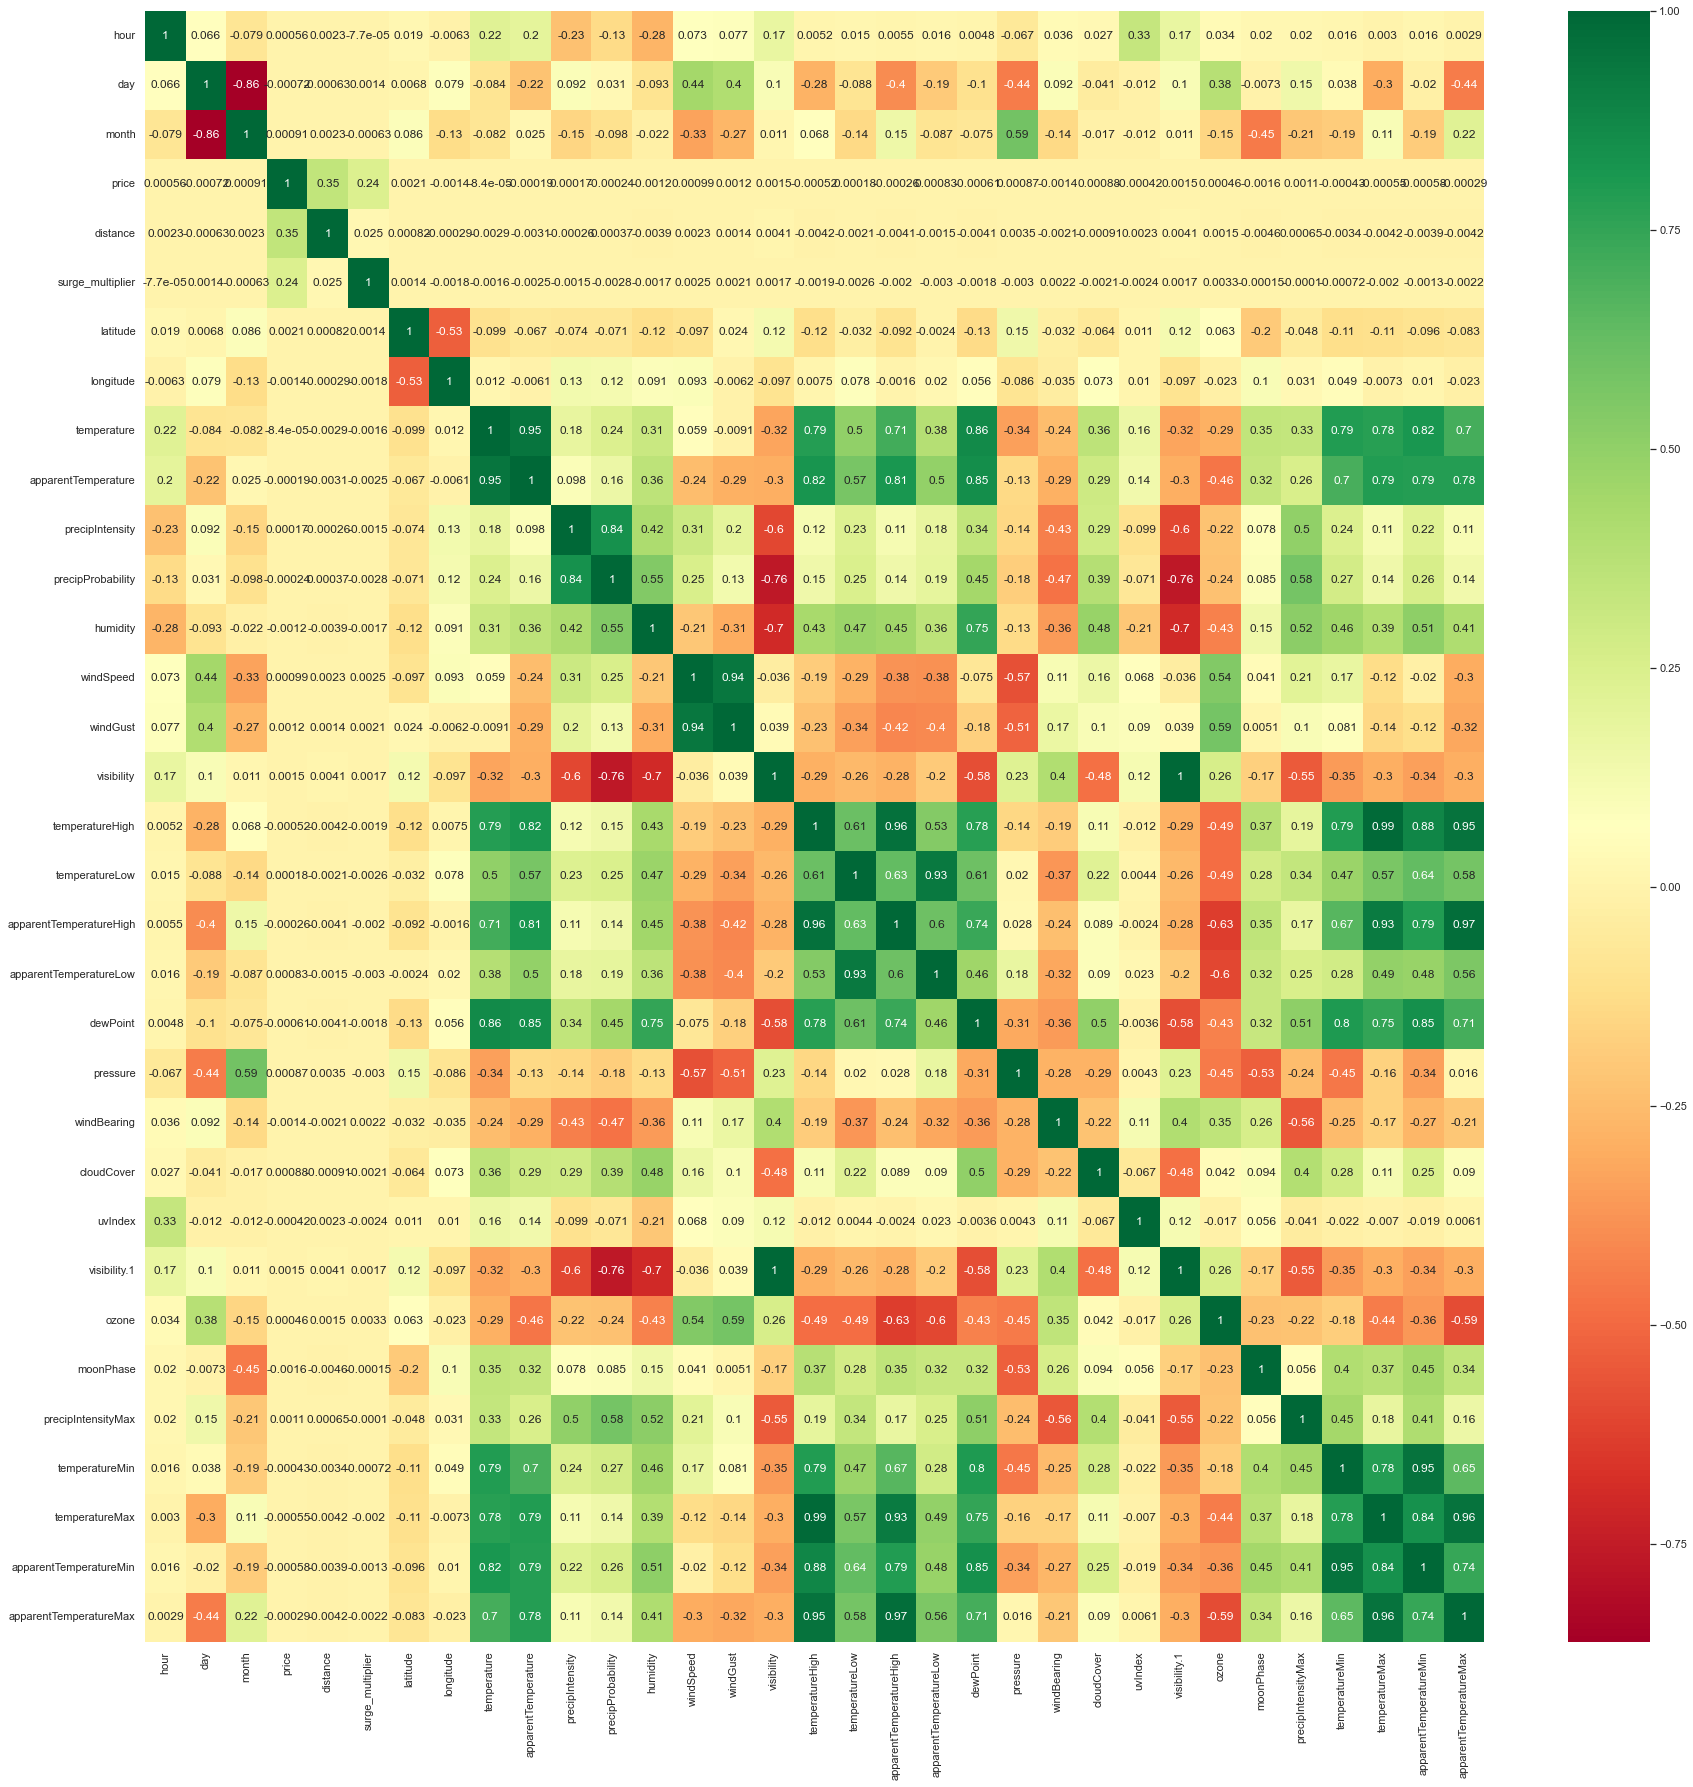

In [110]:
# Checking correlation between each parameter

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(30,30))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

In this correlation matrix, every correlation between each feature are calculated. The result will be vary from `-1 to 1`, in which:
- Any value that getting closer to 1 represent strong positive correlation (symbolized with green color)
- Any value that getting closer to -1 represent strong negative correlation (symbolized with red color)
- Middle value will be 0 that represent neutral correlation (symbolized with yellow color)

From correlation matrix above, We can see our input parameter that correlated to target parameter `price` are `distance` and `surge_multiplier` input parameter. (symbolized with bright green)\
Rest of the input parameters besides those two has neutral correlation with the target parameter (symbolized with bright yellow)
 
This fact also confirm that `surge affect pricing` stated from article above is true.

### Cardinality Check

In this part of sub process, I'll run through `categorical` input parameter and check their `Cardinality`. There will be a chance that I will `re-classify` input parameter with `high-cardinality` or even `drop` whole input parameter with `low-variance.`

In [111]:
# Classify input parameter

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

In [112]:
# Cardinality Summary
for i in df[categorical_col].columns:
    print(i, ':', len(df[i].unique()))

id : 693071
timestamp : 1
timezone : 1
source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
short_summary : 9
long_summary : 11
windGustTime : 1
temperatureHighTime : 1
temperatureLowTime : 1
apparentTemperatureHighTime : 1
apparentTemperatureLowTime : 1
icon : 7
sunriseTime : 1
sunsetTime : 1
uvIndexTime : 1
temperatureMinTime : 1
temperatureMaxTime : 1
apparentTemperatureMinTime : 1
apparentTemperatureMaxTime : 1


From summary above, I will drop these input feature:
- id : because all value is unique (high variance) and no direct impact to `pricing` target parameter.
- timestamp format input parameter : because all value is same (equal to 1 and 0 variance).

In [113]:
# Drop above input parameter

df.drop(['id', 'timestamp', 'timezone', 'windGustTime', 'temperatureHighTime',
        'temperatureLowTime', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
        'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
        'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'], axis=1, inplace=True)

Now let's focus check other input parameter with `high-cardinality`

In [114]:
# Dataframe Check
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

df[categorical_col]

,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...,...,...,...,...,...
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693068,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


In [115]:
# Cardinality Summary 2
for i in df[categorical_col].columns:
    print(i, ':', len(df[i].unique()))

source : 12
destination : 12
cab_type : 2
product_id : 13
name : 13
short_summary : 9
long_summary : 11
icon : 7


From second summary above, I can say that input parameter like `'source'`, `'destination'`, `'product_id'`, `'name'`, `'short_summary'`, `'long_summary'` and `'icon'` has `high-cardinality`.\
I'll check on those input parameter and see if there is possibility to `re-classify` it so I can have `low-cardinality` input parameter.

In [116]:
# Cardinality Check
# Input Parameter : `source` & `destination`

print(df['source'].unique())
print()
print(df['destination'].unique())

['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']


`'source'` & `'destination'` input parameter tells us from and where the ride is take place. This value shows name of places in `Boston.`\
Since I am not familiar of those places, I cannot find any connection between places, hence I'll let the value be like that without `re-classify` them.

In [117]:
# Cardinality Check
# Input Parameter : `product_id` & `name`

print(df['product_id'].unique())
print()
print(df['name'].unique())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']


I see a pattern between `'product_id'` & `'name'` input parameter, it seems `name` input parameter are `product_id` name. Let's check it.

In [118]:
# Confirmation process
# `product_id` : `name`

for i in df['product_id'].unique():
    print(i,':', 
    df[df['product_id']==i]['name'].unique().item()
    )

lyft_line : Shared
lyft_premier : Lux
lyft : Lyft
lyft_luxsuv : Lux Black XL
lyft_plus : Lyft XL
lyft_lux : Lux Black
6f72dfc5-27f1-42e8-84db-ccc7a75f6969 : UberXL
6c84fd89-3f11-4782-9b50-97c468b19529 : Black
55c66225-fbe7-4fd5-9072-eab1ece5e23e : UberX
9a0e7b09-b92b-4c41-9779-2ad22b4d779d : WAV
6d318bcc-22a3-4af6-bddd-b409bfce1546 : Black SUV
997acbb5-e102-41e1-b155-9df7de0a73f2 : UberPool
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a : Taxi


Yep, it is confirmed that `name` input parameter are `product_id` name. Basically both input parameter share same meaning. I'll keep one input parameter and discard the other.\
Also, since this input parameter shows differentiation of `'service type'` which affect the `price` estimation, I'll let this input parameter be. (no `re-classification` to lower `cardinality`)

In [119]:
# Drop `product_id`

df.drop(columns='product_id', axis=1, inplace=True)

Now let's check the `'short_summary'`, `'long_summary'`, and `'icon'`

In [120]:
# Dataframe Check
df[['short_summary', 'long_summary', 'icon']]

,short_summary,long_summary,icon
0,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,Rain,"Rain until morning, starting again in the eve...",rain
2,Clear,Light rain in the morning.,clear-night
3,Clear,Partly cloudy throughout the day.,clear-night
4,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night
...,...,...,...
693066,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693067,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693068,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night
693069,Partly Cloudy,Light rain in the morning and overnight.,partly-cloudy-night


Based from dataframe above I know those three input parameter are related to each other. They show connection in terms of `weather condition.`
Let's see it more deeply.

In [121]:
# Finding connection between `short_summary` & `long_summary`
for i in df['short_summary'].unique():
    print(i,':',
    df[
        df['short_summary']==i
    ]['long_summary'].unique().tolist()
    )
    print('#'*100)

 Mostly Cloudy  : [' Rain throughout the day. ', ' Partly cloudy throughout the day. ', ' Light rain in the morning. ', ' Mostly cloudy throughout the day. ', ' Light rain in the morning and overnight. ', ' Foggy in the morning. ', ' Overcast throughout the day. ']
####################################################################################################
 Rain  : [' Rain until morning, starting again in the evening. ', ' Rain throughout the day. ', ' Light rain in the morning. ']
####################################################################################################
 Clear  : [' Light rain in the morning. ', ' Partly cloudy throughout the day. ', ' Mostly cloudy throughout the day. ', ' Rain throughout the day. ', ' Foggy in the morning. ', ' Light rain in the morning and overnight. ']
####################################################################################################
 Partly Cloudy  : [' Mostly cloudy throughout the day. ', ' Light rain in the m

Well, looking from result above, I am troubled to find any consistent pattern for each unique value.

e.g : `short_summary : 'Foggy'` has shown values like `'Rain until morning, starting again in the evening'` and `'Rain in the morning and afternoon'` while,\
       `short_summary : 'Rain'` also shown values like `'Rain until morning, starting again in the evening'`

both `short_summary` shown values alike although they have different `categories.` So, I'll just leave them be at the moment, and check the other connection.

In [122]:
# Finding connection between `short_summary` & `icon`
for i in df['short_summary'].unique():
    print(i,':',
    df[
        df['short_summary']==i
    ]['icon'].unique().tolist()
    )
    print('#'*50)

 Mostly Cloudy  : [' partly-cloudy-night ', ' partly-cloudy-day ']
##################################################
 Rain  : [' rain ']
##################################################
 Clear  : [' clear-night ', ' clear-day ']
##################################################
 Partly Cloudy  : [' partly-cloudy-night ', ' partly-cloudy-day ']
##################################################
 Overcast  : [' cloudy ']
##################################################
 Light Rain  : [' rain ']
##################################################
 Foggy  : [' fog ']
##################################################
 Possible Drizzle  : [' rain ']
##################################################
 Drizzle  : [' rain ']
##################################################


Well, it looks like more easy to find pattern between these two input parameter. My plan in reducing the cardinality for both input parameter will be:

**short_summary re-classification**

- Put 'Mostly Cloudy', 'Partly Cloudy', and 'Overcast' into same class which is `Cloudy`
- Put 'Rain', 'Light Rain', 'Possible Drizzle', and 'Drizzle' into same class which is `Rain`
- Let `Clear` and `Foggy` as it is. (No re-classification) 

**icon re-classification**

- Put 'partly-cloudy-night', 'partly-cloudy-day', and 'cloudy' into same icon which is `Cloudy`
- Put 'clear-night' and 'clear-day' into same icon which is `Clear`
- Let `fog` and `rain` as it is. (No re-classification) 

In [123]:
# Re-classification Process
# Input Parameter : short_summary

# Create new empty list
short_summary_new = []

for i in df['short_summary']:
    if i in [' Mostly Cloudy ', ' Partly Cloudy ', ' Overcast ']:
        short_summary_new.append('Cloudy')
    elif i in [' Rain ', ' Light Rain ', ' Possible Drizzle ', ' Drizzle ']:
        short_summary_new.append('Rain')
    elif i == ' Foggy ':
        short_summary_new.append('Foggy')
    else:
        short_summary_new.append('Clear')

# add list into dataframe
df['short_summary_new'] = short_summary_new

In [124]:
# Re-classification Process
# Input Parameter : icon

# Create new empty list
icon_new = []

for i in df['icon']:
    if i in [' partly-cloudy-night ', ' partly-cloudy-day ', ' cloudy ']:
        icon_new.append('Cloudy')
    elif i in [' clear-night ', ' clear-day ']:
        icon_new.append('Clear')
    elif i == ' fog ':
        icon_new.append('Fog')
    else:
        icon_new.append('Rain')

# add list into dataframe
df['icon_new'] = icon_new

In [125]:
# Cardinality Re-check
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

for i in df[categorical_col].columns:
    print(i, ':', len(df[i].unique()))

source : 12
destination : 12
cab_type : 2
name : 13
short_summary : 9
long_summary : 11
icon : 7
short_summary_new : 4
icon_new : 4


So this is the recap of `Cardinality check` process above:

- Drop : `'id'`, `'timestamp'`, `'product_id'`  because no apparent use to price estimation
- Reclassification : `short_summary` and `icon` to achieve lower cardinality
- Let be : `source`, `destination`, `name`, `long_summary`

After get to know with `Categorical` input parameter in the dataset, now let's explore the `Numerical` input parameter.

<function matplotlib.pyplot.show(close=None, block=None)>

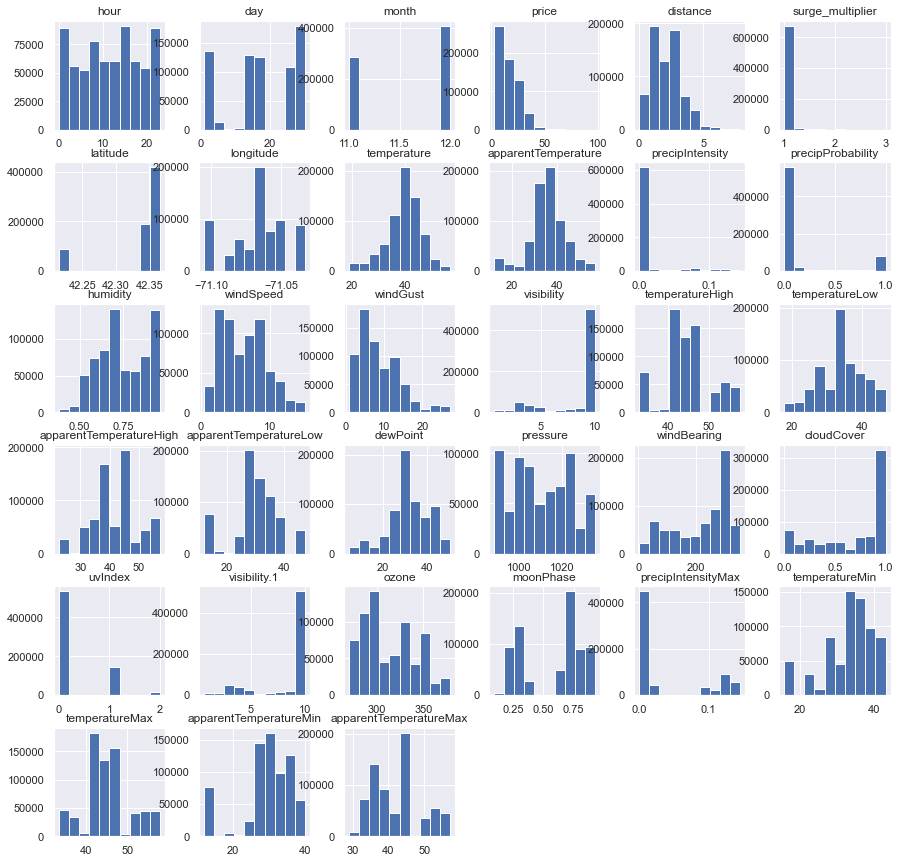

In [126]:
# Histogram Plot

df[numerical_col].hist()
plt.gcf().set_size_inches(15, 15)
plt.show


Based on histogram above, it looks like there are several input parameter that is actually `Categorical` but in form of `Numerical` input.

Those input parameter are:
- month
- uvIndex

I will put those input parameter into `categorical_col` in later process.\
Also,it looks like `visibility` and `visibility.1` input parameter are the same, let's check it closely. 

In [127]:
# `visibility` and `visibility.1` input parameter value check

df['visibility'].equals(df['visibility.1'])

True

It is confirmed that `visibility` and `visibility.1` input parameter are the same, let's drop one of them.

In [128]:
# Drop `visibility.1` input parameter

df.drop(columns='visibility.1', inplace=True)

Now I finish doing `Exploratory Data Analysis`, here are summary of what i have done in this proccess:
- Search some information on internet and assume 'name' & 'surge_multiplier' input parameter play role in `price estimation.`
- Do Cardinality check for each `categorical` input parameter and make some adjustment in it.
- Quick look into `numerical` input parameter to check its distribution.

The next step will be `Data Preprocessing.` 

## V. Data Preprocessing

In this process I  split my dataset and then handling any outliers and missing value inside the dataset. After that I will do feature selection followed by feature scaling and encoding.

### Dataset Splitting

In this process, I will split my dataset into three different set:
1. Train Set : Will be used to `train` the `machine learning` model.
2. Test Set : Will be used to `test` the `machine learning` model.
3. Inference Set : Will be used `as if` new instance that is taken from real population.

Since the entries in the dataset is `693071 rows`, I will use `3071 entries as Inference Set`, `80% of 690000 entries as Training Set`, and `20% of 690000 as Test Set.`:

1. Train Set : 552000 entries
2. Test Set : 138000 entries
3. Inference Set : 3071 entries

all of those entries will be randomly selected from the dataset.

In [129]:
# Inference Set Preparation

inf_set = df.sample(3071, random_state=10)
inf_set.shape

(3071, 42)

In [130]:
# Exclude Inference Set from main dataset
train_test_set = df.drop(inf_set.index)
train_test_set.reset_index(inplace=True)

train_test_set.shape

(690000, 43)

In [131]:
# Splitting Dataset

# X will be consist of input parameter only
X = train_test_set.drop(['price'], axis=1)

# y will be consist of target parameter only
y = train_test_set['price']

In [132]:
# Train Set & Test Set Preparation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)

Train Set shape :  (552000, 42)
Test Set shape :  (138000, 42)


### Handling Outliers

In this sub-process, I will try to look the outliers inside `'numerical_col'` input parameter.

I'll check the distribution of the input parameter first. Distribution check is important for determining how to handle the outliers.

- If the input parameter is normally distributed, `Z-score` will be utilized for determining the outliers threshold.
- If the input parameter is skew distributed, `IQR` will be utilized for determining the outliers threshold.

I'll utilize `pandas.skewness()` method for this distribution check. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`

In [133]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

In [134]:
# Skew dist
print('skew_dist :', skew_dist)
print("######"*10)
# normal_dist
print('normal_dist :',normal_dist)
print("######"*10)

skew_dist : ['distance', 'surge_multiplier', 'latitude', 'temperature', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'uvIndex', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']
############################################################
normal_dist : ['index', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'pressure', 'ozone', 'moonPhase', 'temperatureMax']
############################################################


From result above, We can ignore `index` since it is not input parameter.

We will focus on input parameter that is in `'numerical_col'`, since there is no such outliers in input parameter in `'categorical_col'` 

Now let's check if there are any outliers in each input parameter.

In [135]:
# Outliers Detection Function
# for Normally Distributed Data

def detect1(df, parameter):

    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    result = df[
        abs((df[parameter]-mean_)/std_) > threshold
    ]
    return result


In [136]:
# Outliers Detection Function
# for Skew Distributed Data

def detect2(df, parameter):

    IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
    upper = df[parameter].quantile(0.75) + (1.5*IQR)
    bottom = df[parameter].quantile(0.25) - (1.5*IQR)

    result = df[
        (df[parameter] > upper) |
        (df[parameter] < bottom)
    ]
    return result
    
    

In [137]:
# Outliers Detection Function
# for Skew Distributed Data

def detect3(df, parameter):

    IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
    upper = df[parameter].quantile(0.75) + (3*IQR)
    bottom = df[parameter].quantile(0.25) - (3*IQR)

    result = df[
        (df[parameter] > upper) |
        (df[parameter] < bottom)
    ]
    return result

In [138]:
# Outlier summary
# For normally distributed input parameter

for i in normal_dist:
    result = detect1(X_train, parameter=i)
    print('Input Parameter: ', i)
    print()
    print('Outliers count :', len(result))
    print('Total entries :', len(X_train[i]))
    print('Outliers percentage :', len(result)/len(X_train[i])*100)
    print("######"*5)

Input Parameter:  index

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  hour

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  day

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  month

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  longitude

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  apparentTemperature

Outliers count : 1484
Total entries : 552000
Outliers percentage : 0.2688405797101449
##############################
Input Parameter:  humidity

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  windSpeed

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0

In [139]:
# Outlier summary
# For normally distributed input parameter

for i in normal_dist:
    result = detect1(X_test, parameter=i)
    print('Input Parameter: ', i)
    print()
    print('Outliers count :', len(result))
    print('Total entries :', len(X_test[i]))
    print('Outliers percentage :', len(result)/len(X_test[i])*100)
    print("######"*5)

Input Parameter:  index

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  hour

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  day

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  month

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  longitude

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  apparentTemperature

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  humidity

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  windSpeed

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
#################

It looks like our `normally distributed` input parameter is free from outliers, now let's see our skew distributed input parameter.

In [140]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    result = detect2(X_train, parameter=i)
    print('Input Parameter: ', i)
    print()
    print('Outliers count :', len(result))
    print('Total entries :', len(X_train[i]))
    print('Outliers percentage :', len(result)/len(X_train[i])*100)
    print("######"*5)

Input Parameter:  distance

Outliers count : 6843
Total entries : 552000
Outliers percentage : 1.2396739130434784
##############################
Input Parameter:  surge_multiplier

Outliers count : 16769
Total entries : 552000
Outliers percentage : 3.03786231884058
##############################
Input Parameter:  latitude

Outliers count : 70655
Total entries : 552000
Outliers percentage : 12.79981884057971
##############################
Input Parameter:  temperature

Outliers count : 29258
Total entries : 552000
Outliers percentage : 5.3003623188405795
##############################
Input Parameter:  precipIntensity

Outliers count : 120231
Total entries : 552000
Outliers percentage : 21.780978260869567
##############################
Input Parameter:  precipProbability

Outliers count : 120231
Total entries : 552000
Outliers percentage : 21.780978260869567
##############################
Input Parameter:  windGust

Outliers count : 13392
Total entries : 552000
Outliers percentage : 2.4

In [141]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    result = detect2(X_test, parameter=i)
    print('Input Parameter: ', i)
    print()
    print('Outliers count :', len(result))
    print('Total entries :', len(X_test[i]))
    print('Outliers percentage :', len(result)/len(X_test[i])*100)
    print("######"*5)

Input Parameter:  distance

Outliers count : 1614
Total entries : 138000
Outliers percentage : 1.1695652173913043
##############################
Input Parameter:  surge_multiplier

Outliers count : 4117
Total entries : 138000
Outliers percentage : 2.9833333333333334
##############################
Input Parameter:  latitude

Outliers count : 17498
Total entries : 138000
Outliers percentage : 12.679710144927537
##############################
Input Parameter:  temperature

Outliers count : 7232
Total entries : 138000
Outliers percentage : 5.240579710144928
##############################
Input Parameter:  precipIntensity

Outliers count : 29912
Total entries : 138000
Outliers percentage : 21.67536231884058
##############################
Input Parameter:  precipProbability

Outliers count : 29912
Total entries : 138000
Outliers percentage : 21.67536231884058
##############################
Input Parameter:  windGust

Outliers count : 3377
Total entries : 138000
Outliers percentage : 2.447101

looks like there is outliers in most of skew distributed input parameter.\
there are some input parameter that has outliers:

- below 5% : `distance, surge_multiplier, windGust, temperatureMin`
- between 5% to 15% : `latitude, temperature, apparentTemperatureLow, apparentTemperatureMin, apparentTemperatureMax`
- over 15% : `precipIntensity, precipProbability, visibility, uvIndex`

If we look closely, input parameter that is important to the `price estimation` are `distance` and `surge_multiplier.` Other input parameter is `temperature and weather` related.\
My judgement for this outliers handling are:

1. let the outliers be in `distance and surge_multiplier` input parameter. My reason for this is
> outliers are below 5% and I think it is good to have outliers here, In training process my model would be able to recognize more patern

2. let the outliers be in `temperature and weather` related input parameter. My reason for this is
> - temperature and weather is something very unpredictable in nature, so it is natural to have outliers in it
> - these input parameters is not my main focus (at least at the moment)

Outside above reason, I also want to preserve the amount of my dataset for model training and testing purpose. The more data I can feed to the model the better.

To support my decision better, I will try to check the outliers count again but this time using `3*IQR` threshold.

In [142]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    result = detect3(X_train, parameter=i)
    print('Input Parameter: ', i)
    print()
    print('Outliers count :', len(result))
    print('Total entries :', len(X_train[i]))
    print('Outliers percentage :', len(result)/len(X_train[i])*100)
    print("######"*5)

Input Parameter:  distance

Outliers count : 4
Total entries : 552000
Outliers percentage : 0.0007246376811594203
##############################
Input Parameter:  surge_multiplier

Outliers count : 16769
Total entries : 552000
Outliers percentage : 3.03786231884058
##############################
Input Parameter:  latitude

Outliers count : 70655
Total entries : 552000
Outliers percentage : 12.79981884057971
##############################
Input Parameter:  temperature

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
##############################
Input Parameter:  precipIntensity

Outliers count : 120231
Total entries : 552000
Outliers percentage : 21.780978260869567
##############################
Input Parameter:  precipProbability

Outliers count : 120231
Total entries : 552000
Outliers percentage : 21.780978260869567
##############################
Input Parameter:  windGust

Outliers count : 0
Total entries : 552000
Outliers percentage : 0.0
######################

In [143]:
# Outlier summary
# For skew distributed input parameter

for i in skew_dist:
    result = detect3(X_test, parameter=i)
    print('Input Parameter: ', i)
    print()
    print('Outliers count :', len(result))
    print('Total entries :', len(X_test[i]))
    print('Outliers percentage :', len(result)/len(X_test[i])*100)
    print("######"*5)

Input Parameter:  distance

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  surge_multiplier

Outliers count : 4117
Total entries : 138000
Outliers percentage : 2.9833333333333334
##############################
Input Parameter:  latitude

Outliers count : 17498
Total entries : 138000
Outliers percentage : 12.679710144927537
##############################
Input Parameter:  temperature

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Parameter:  precipIntensity

Outliers count : 29912
Total entries : 138000
Outliers percentage : 21.67536231884058
##############################
Input Parameter:  precipProbability

Outliers count : 29912
Total entries : 138000
Outliers percentage : 21.67536231884058
##############################
Input Parameter:  windGust

Outliers count : 0
Total entries : 138000
Outliers percentage : 0.0
##############################
Input Param

After using higher value for threshold value, most outliers count is significantly dropped, except `precipIntensity`, `precipProbability`, and `uvIndex`.
Once again I think `temperature and weather is something very unpredictable in nature, so it is natural to have outliers in it`, so I'll stick to the plan above.

### Missing Value

In this sub-process, I will handle any missing value inside the dataset. From previous process, We know that only `price` as target parameter that has apparent missing value, let's check it.

In [144]:
# Standard Missing Value count summary

print(X_train.isnull().sum())
print()
print(X_test.isnull().sum())

index                      0
hour                       0
day                        0
month                      0
datetime                   0
source                     0
destination                0
cab_type                   0
name                       0
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
short_summary              0
long_summary               0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
icon                       0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
ozone                      0
moonPhase     

In [145]:
# Standard Missing Value count summary

print(y_train.isnull().sum())
print()
print(y_test.isnull().sum())

43907

10933


It is confirmed, our standard missing value is only found in `price` target parameter, 43807 in train set and 11079 in test set. Let's look more into it.

In [146]:
# Missing value on train set

# find index number of the missing value
ind_list_train = y_train[y_train.isnull()==1].index

# show entries that has missing value
X_train[X_train.index.isin(ind_list_train)]

,index,hour,day,month,datetime,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,short_summary_new,icon_new
120927,121497,5,15,12,2018-12-15 05:15:08,North End,Financial District,Uber,Taxi,1.04,1.0,42.3661,-71.0631,45.18,42.30,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.93,5.38,8.31,8.432,54.47,38.94,53.80,35.08,cloudy,43.18,1022.76,219,1.00,0,298.0,0.27,0.0074,39.54,54.47,36.46,53.80,Cloudy,Cloudy
228246,229282,18,26,11,2018-11-26 18:35:10,Northeastern University,West End,Uber,Taxi,2.94,1.0,42.3503,-71.0810,45.46,42.47,Overcast,"Rain until morning, starting again in the eve...",0.0005,0.03,0.86,5.65,6.57,8.202,46.46,42.17,43.81,37.08,cloudy,41.50,1011.31,114,1.00,1,294.0,0.64,0.1245,40.67,46.46,37.45,43.81,Cloudy,Cloudy
465225,467309,13,16,12,2018-12-16 13:50:08,Beacon Hill,Fenway,Uber,Taxi,2.32,1.0,42.3559,-71.0550,42.11,37.54,Overcast,Rain throughout the day.,0.0000,0.00,0.70,7.26,8.97,9.779,43.80,34.18,38.35,28.19,cloudy,32.91,1022.24,83,0.91,0,321.1,0.30,0.1261,39.28,43.80,33.84,38.35,Cloudy,Cloudy
91651,92090,7,27,11,2018-11-27 07:15:23,South Station,North Station,Uber,Taxi,2.29,1.0,42.3647,-71.0542,43.29,37.33,Light Rain,Light rain in the morning.,0.0772,1.00,0.90,11.02,13.93,2.683,47.11,33.85,44.14,30.03,rain,40.67,996.90,65,1.00,0,286.1,0.68,0.1430,36.34,47.11,32.26,44.14,Rain,Rain
495113,497326,0,15,12,2018-12-15 00:00:12,West End,South Station,Uber,Taxi,2.14,1.0,42.3505,-71.1054,41.60,39.31,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.81,3.84,3.84,9.768,46.70,40.93,44.06,38.98,cloudy,36.14,1027.40,183,0.89,0,290.1,0.24,0.0000,26.51,46.70,27.16,44.06,Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365212,366839,15,29,11,2018-11-29 15:43:04,South Station,Back Bay,Uber,Taxi,3.44,1.0,42.3519,-71.0551,43.00,37.07,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.54,10.72,14.22,9.931,44.76,28.78,38.44,26.32,partly-cloudy-day,27.34,1006.43,313,0.49,1,326.8,0.75,0.0000,35.12,44.76,30.85,38.44,Cloudy,Cloudy
513300,515576,8,14,12,2018-12-14 08:10:11,West End,Fenway,Uber,Taxi,2.84,1.0,42.3588,-71.0707,28.20,28.20,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.79,1.89,2.87,9.666,46.45,40.89,43.71,38.78,partly-cloudy-night,22.53,1033.96,152,0.37,0,297.3,0.24,0.0000,27.07,46.45,27.72,43.71,Cloudy,Cloudy
117583,118141,0,14,12,2018-12-14 00:40:12,Beacon Hill,Fenway,Uber,Taxi,2.37,1.0,42.3647,-71.0542,31.25,31.25,Overcast,Partly cloudy throughout the day.,0.0000,0.00,0.64,2.62,3.54,10.000,33.83,27.27,32.85,24.61,cloudy,20.53,1035.06,173,0.91,0,326.7,0.21,0.0001,18.29,33.83,13.79,32.85,Cloudy,Cloudy
371403,373062,21,2,12,2018-12-02 21:22:57,North Station,Northeastern University,Uber,Taxi,3.30,1.0,42.2148,-71.0330,52.10,52.10,Possible Drizzle,Rain throughout the day.,0.0020,0.46,0.95,4.31,4.34,3.894,52.86,46.60,52.19,47.25,rain,50.67,1003.15,223,1.00,0,282.7,0.86,0.1055,36.35,52.86,35.33,52.19,Rain,Rain


In [147]:
# Missing value on test set

# find index number of the missing value
ind_list_test = y_test[y_test.isnull()==1].index

# show entries that has missing value
X_test[X_test.index.isin(ind_list_test)]

,index,hour,day,month,datetime,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,short_summary_new,icon_new
37006,37186,5,15,12,2018-12-15 05:40:14,Boston University,West End,Uber,Taxi,3.04,1.0,42.3661,-71.0631,45.18,42.30,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.93,5.38,8.31,8.432,54.47,38.94,53.80,35.08,cloudy,43.18,1022.76,219,1.00,0,298.0,0.27,0.0074,39.54,54.47,36.46,53.80,Cloudy,Cloudy
375856,377540,14,3,12,2018-12-03 14:53:05,North End,Beacon Hill,Uber,Taxi,2.67,1.0,42.3519,-71.0551,52.45,52.45,Mostly Cloudy,Foggy in the morning.,0.0000,0.00,0.87,4.95,4.95,10.000,57.27,33.67,56.60,28.00,partly-cloudy-day,48.63,999.97,236,0.81,1,301.0,0.89,0.0005,42.89,57.27,39.54,56.60,Cloudy,Cloudy
331199,332680,21,28,11,2018-11-28 21:35:07,North End,West End,Uber,Taxi,1.16,1.0,42.3519,-71.0551,41.35,35.62,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.60,9.29,11.60,10.000,42.60,37.33,36.56,31.82,cloudy,28.39,993.87,295,1.00,0,355.2,0.72,0.0000,33.70,42.60,29.88,36.56,Cloudy,Cloudy
53130,53382,18,28,11,2018-11-28 18:41:23,Theatre District,North End,Uber,Taxi,1.57,1.0,42.3647,-71.0542,40.92,35.13,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.64,9.21,15.03,10.000,42.61,37.60,36.57,32.12,cloudy,29.57,991.21,296,1.00,1,353.1,0.72,0.0000,33.85,42.61,30.03,36.57,Cloudy,Cloudy
28248,28380,0,1,12,2018-12-01 00:28:08,Beacon Hill,Fenway,Uber,Taxi,2.32,1.0,42.3503,-71.0810,38.72,36.65,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.64,3.23,3.53,9.725,42.32,31.57,40.48,28.10,cloudy,27.43,1017.51,292,1.00,0,288.7,0.79,0.0004,28.64,42.32,29.29,40.48,Cloudy,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617628,620371,13,18,12,2018-12-18 13:55:05,South Station,North Station,Uber,Taxi,1.84,1.0,42.3644,-71.0661,24.61,12.65,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.00,0.51,13.75,25.75,10.000,32.81,20.91,22.77,14.28,partly-cloudy-day,8.84,1008.47,316,0.58,0,373.7,0.37,0.0028,23.05,38.00,11.81,31.89,Cloudy,Cloudy
78567,78953,17,29,11,2018-11-29 17:52:58,Fenway,Beacon Hill,Uber,Taxi,2.46,1.0,42.3429,-71.1003,43.91,38.03,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.50,11.24,22.48,9.973,45.03,28.42,38.93,29.07,partly-cloudy-day,26.27,1006.58,312,0.31,1,314.0,0.75,0.0000,34.83,45.03,30.90,38.93,Cloudy,Cloudy
483372,485545,22,29,11,2018-11-29 22:38:07,North Station,Northeastern University,Uber,Taxi,3.37,1.0,42.3644,-71.0661,40.39,34.47,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.58,9.23,14.50,9.929,44.68,28.64,38.34,27.20,partly-cloudy-night,26.80,1009.88,313,0.25,0,300.7,0.75,0.0000,35.07,44.68,30.92,38.34,Cloudy,Cloudy
62681,62981,13,13,12,2018-12-13 13:05:03,South Station,Financial District,Uber,Taxi,0.66,1.0,42.3519,-71.0643,22.18,17.69,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.64,3.32,3.54,9.428,33.92,27.05,32.95,24.47,partly-cloudy-day,11.78,1033.56,335,0.27,0,328.4,0.21,0.0001,18.05,33.92,13.60,32.95,Cloudy,Cloudy


Looks like there is pattern here, all entries that has missing values has same `'cab_type'` that is `Uber` and `'name'` that is `Taxi`. Let's confirm it.

In [148]:
# Confirmation

# df of missing values
df_miss_train = X_train[X_train.index.isin(ind_list_train)][['cab_type', 'name']]
df_miss_test = X_test[X_test.index.isin(ind_list_test)][['cab_type', 'name']]

# Check the unique value - Train_set
print(df_miss_train['cab_type'].unique())
print(df_miss_train['name'].unique())

# Check the unique value - Test_set
print(df_miss_test['cab_type'].unique())
print(df_miss_test['name'].unique())

['Uber']
['Taxi']
['Uber']
['Taxi']


It is confirmed that all entries that has missing values has same `'cab_type'` that is `Uber` and `'name'` that is `Taxi`.\
Looking broader to the dataset, I couldn't find any reason why `Uber - Taxi` is alway has missing value in `price` parameter. I'll consider this as `Missing Completly at Random.`

In order to preserve the quality of my model, I decide that I will discard these instance.

Before discard I'll check the distribution of `price` parameter and count how much the missing values are.

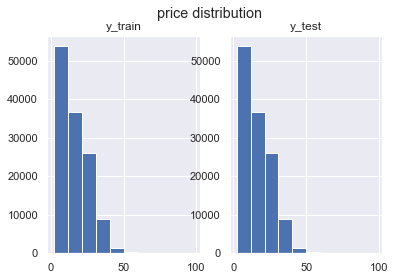

In [149]:
# Check the distribution of input parameter
fig, ax = plt.subplots(1, 2)
fig.suptitle('price distribution')

ax[0].hist(x=y_test, label='y_train')
ax[0].set_title('y_train')
ax[1].hist(x=y_test, label='y_test')
ax[1].set_title('y_test')

plt.show()

In [150]:
# Count how much missing value

print('==================== y_train ====================')
print('Train_missval count :', len(ind_list_train))
print('Train_overall count :', len(y_train))
print('Train_missval percentage :', len(ind_list_train)/len(y_train)*100)
print('==================== y_test ====================')
print('Test_missval count :', len(ind_list_test))
print('Test_overall count :', len(y_test))
print('Test_missval percentage :', len(ind_list_test)/len(y_test)*100)

==================== y_train ====================
Train_missval count : 43907
Train_overall count : 552000
Train_missval percentage : 7.954166666666667
==================== y_test ====================
Test_missval count : 10933
Test_overall count : 138000
Test_missval percentage : 7.922463768115942


Based from `histogram chart` above, We can see that price is `skew distributed` and based from the missing value count, both are about 8% of the entire data.\

It is relatively small amount of data, So I will proceed to discard them.

In [151]:
# Discarding in Train set
print('==================== y_train ====================')
print('Entries count before:', len(X_train))
X_train.drop(ind_list_train, inplace=True)
y_train.drop(ind_list_train, inplace=True)
print('Entries count after:', len(X_train))

# Discarding in Test set
print('==================== y_test ====================')
print('Entries count before:', len(X_test))
X_test.drop(ind_list_test, inplace=True)
y_test.drop(ind_list_test, inplace=True)
print('Entries count after:', len(X_test))

==================== y_train ====================
Entries count before: 552000
Entries count after: 508093
==================== y_test ====================
Entries count before: 138000
Entries count after: 127067


In [152]:
# Confirmation

print(X_train.isna().sum())
print(y_train.isna().sum())

print(X_test.isna().sum())
print(y_test.isna().sum())

index                      0
hour                       0
day                        0
month                      0
datetime                   0
source                     0
destination                0
cab_type                   0
name                       0
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
short_summary              0
long_summary               0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
icon                       0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
ozone                      0
moonPhase     

Based on process above I can confirm that the dataset is now free from missing value.

Let's jump into next process.

### Feature Selection

In this part of sub-process, I will select input parameters that affect the target parameter (`price`).

I'll refer back to the article that I mention in `Exploratory Data Analysis` process above. It is implied that 
>Features that directly affect `price` target parameter prediction are `service type` and `surge pricing.`

In our dataset, input parameter that resemble `'service type'` and `'surge pricing'` are product `'name'` and `'surge_multiplier'`\
Also we know from previous `correlation heatmap` that input parameter like `distance` has good positive correlation with our target parameter `price`\
Hence, I'll keep those input parameter.

What about other Input parameter?\
Let's once again see the correlation heatmap.

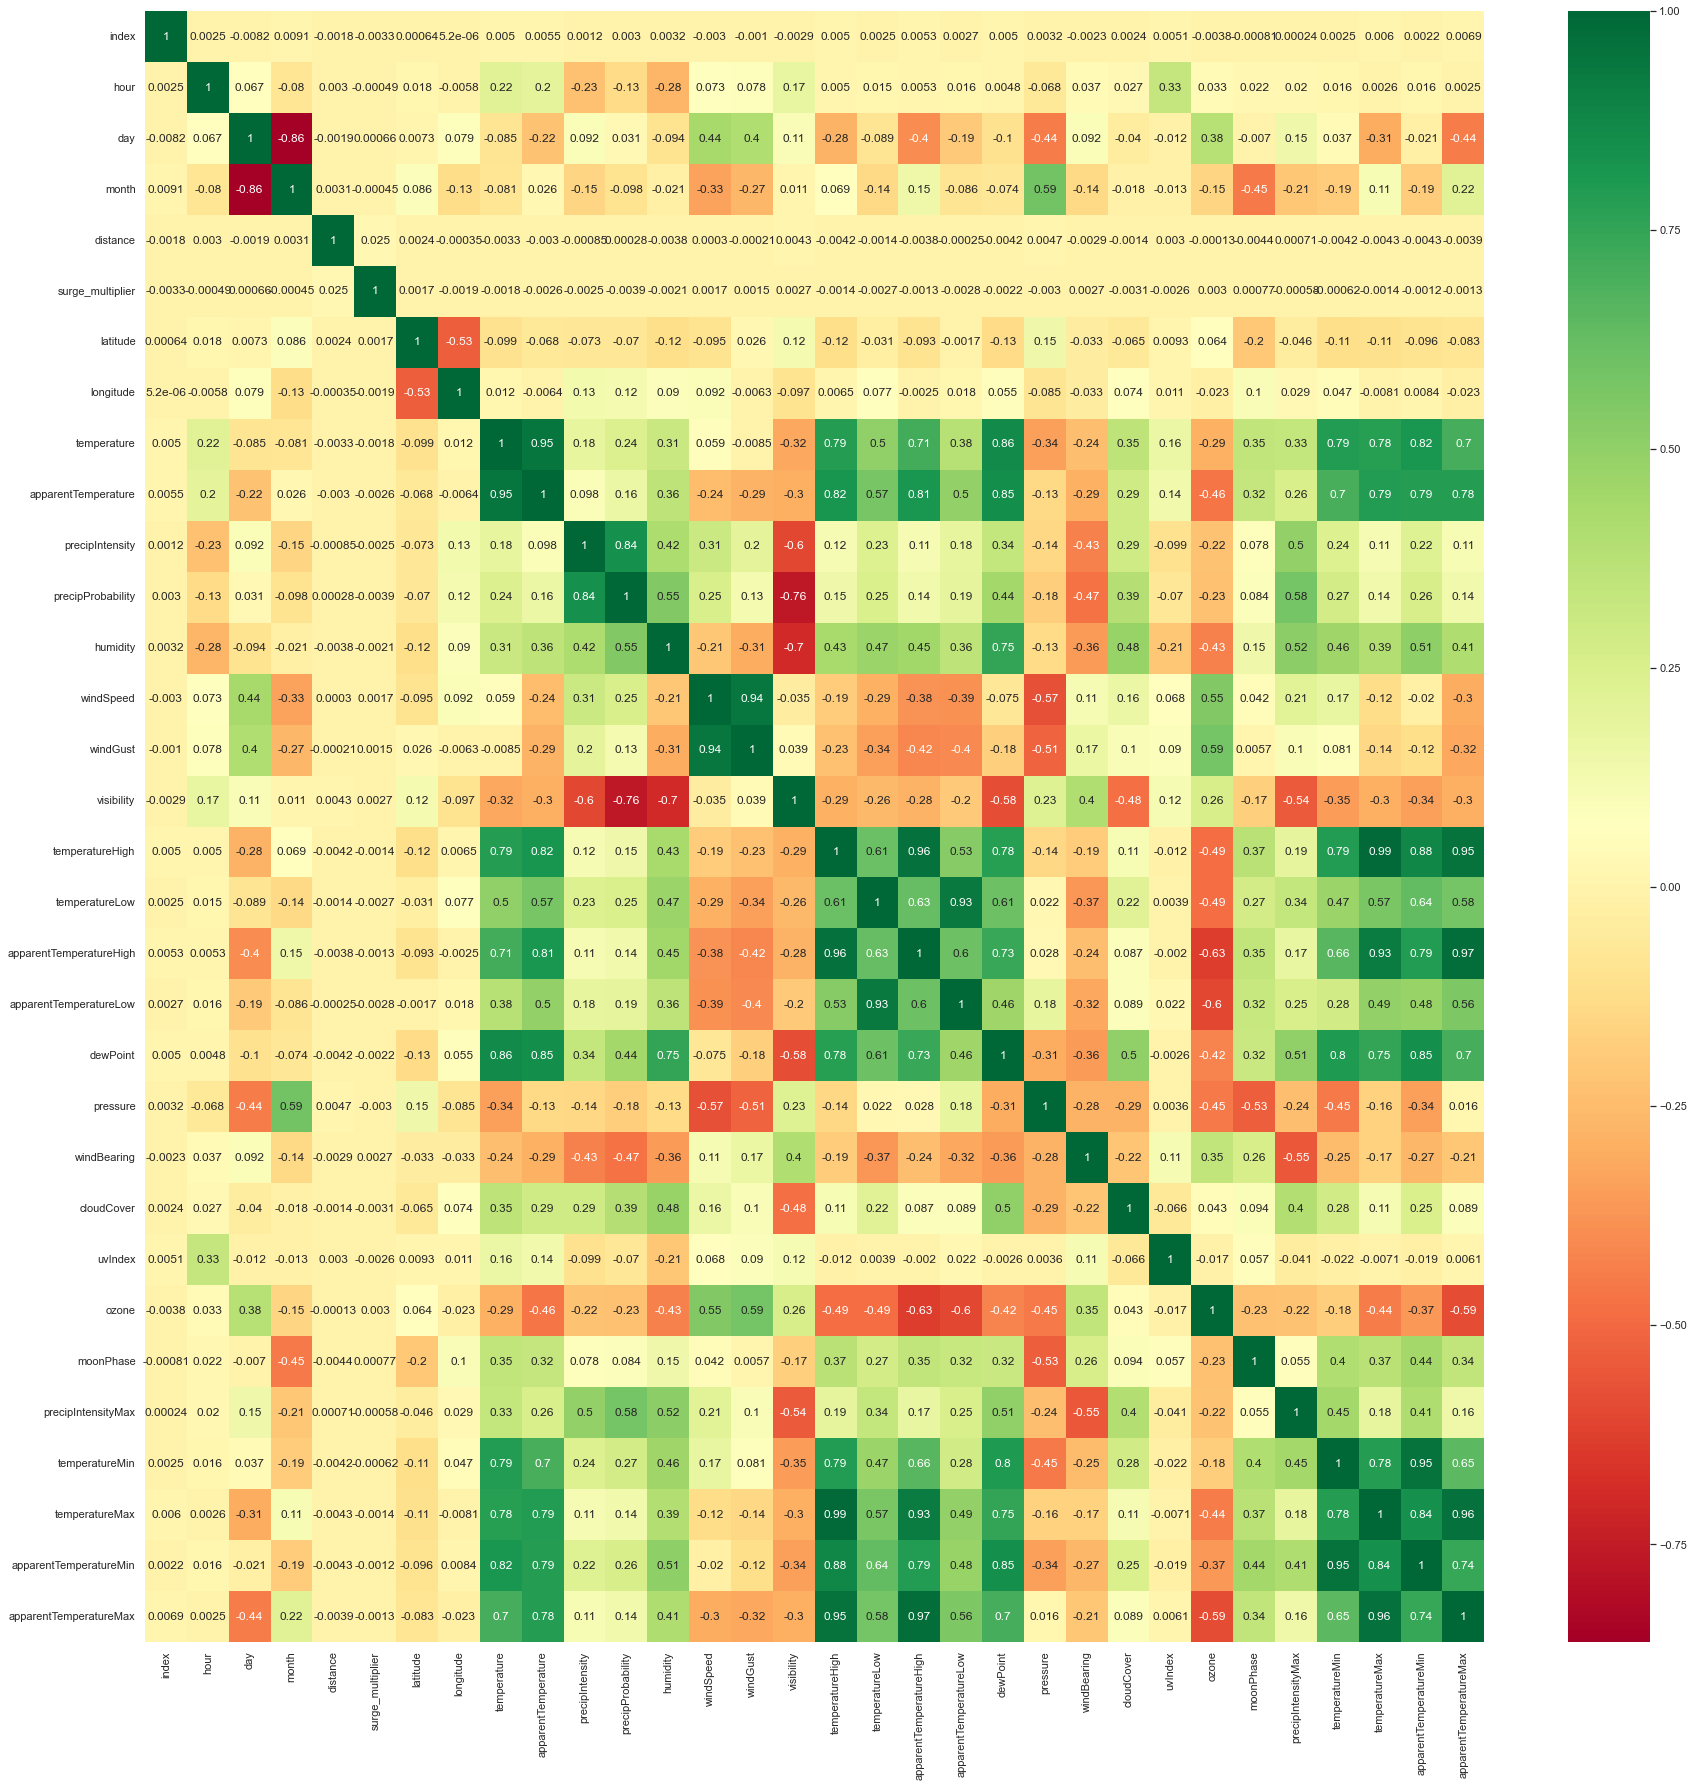

In [153]:
# Checking correlation between each parameter

# Heatmap
corrmat = X_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(30,30))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

It sure this is  a lot of input parameter to see in one place, from previous process I already stated that I'll use input parameter like `distance, name, and surge_multiplier`. Here, I will focus on different input parameter.

If we look closely into the heatmap, there are input parameter that has simmilar name with each others like `temperature, apparenttemperature, temperatureMin, and temperatureMax, etc.` I'll try to focus on each input parameter alike and then choose which one is matter most.

Also, I'll just drop `index` from the dataset, becasuse it is not an input parameter.

In [154]:
# Dropping index input parameter

X_train.drop(columns=['index'], inplace=True)
X_test.drop(columns=['index'], inplace=True)

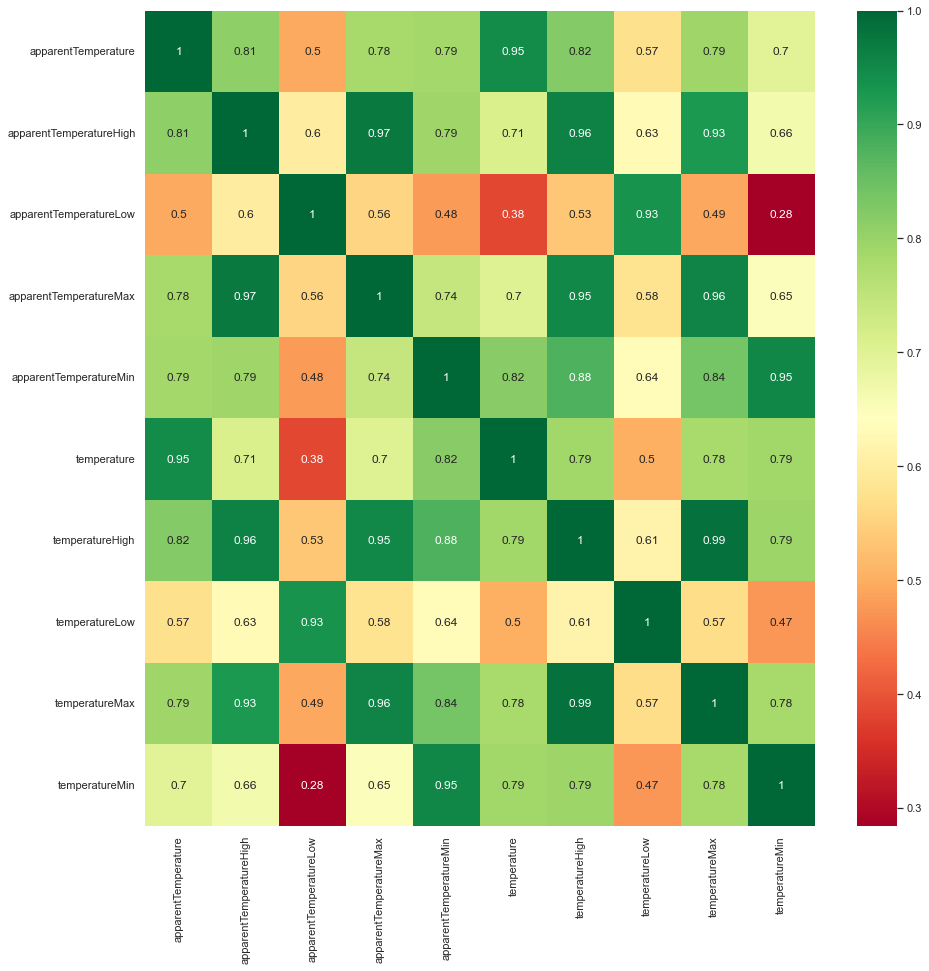

In [155]:
# Checking correlation between parameter alike
# Temperature

temp = ['temperature', 'apparentTemperature', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 
       'temperatureMin', 'temperatureMax','apparentTemperatureMin', 
       'apparentTemperatureMax']

# Heatmap
corrmat = X_train[temp].corr().sort_index()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

Based on correlation matrix above, We can see:
- apparentTemperature has high correlation with temperature
- apparanetTemperatureHigh has high correlation with apparanetTemperatureMax, temperatureHigh, TemperatureMax
- apparentTemperatureLow has high correlation with temperatureLow
- temperature has high correlation with apparentTemperature

This high correlation could mean each input parameter shares the same meaning, Hence they share simmilar name.\
In this process I decide to use only `temperature` input parameter because judging by its name, it's the only parameter that shows current state, not a `High/Max` or `Low/Min` value.

P.S actually `temperature` and `apparentTemperature` literally the same, `apparentTemperature` shows how much the temperature felt by people.

In [156]:
# Drop temperature-like input parameter

# Creating List
drop_temp = ['apparentTemperature', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 
       'temperatureMin', 'temperatureMax','apparentTemperatureMin', 
       'apparentTemperatureMax']

X_train.drop(columns=drop_temp, inplace=True)
X_test.drop(columns=drop_temp, inplace=True)

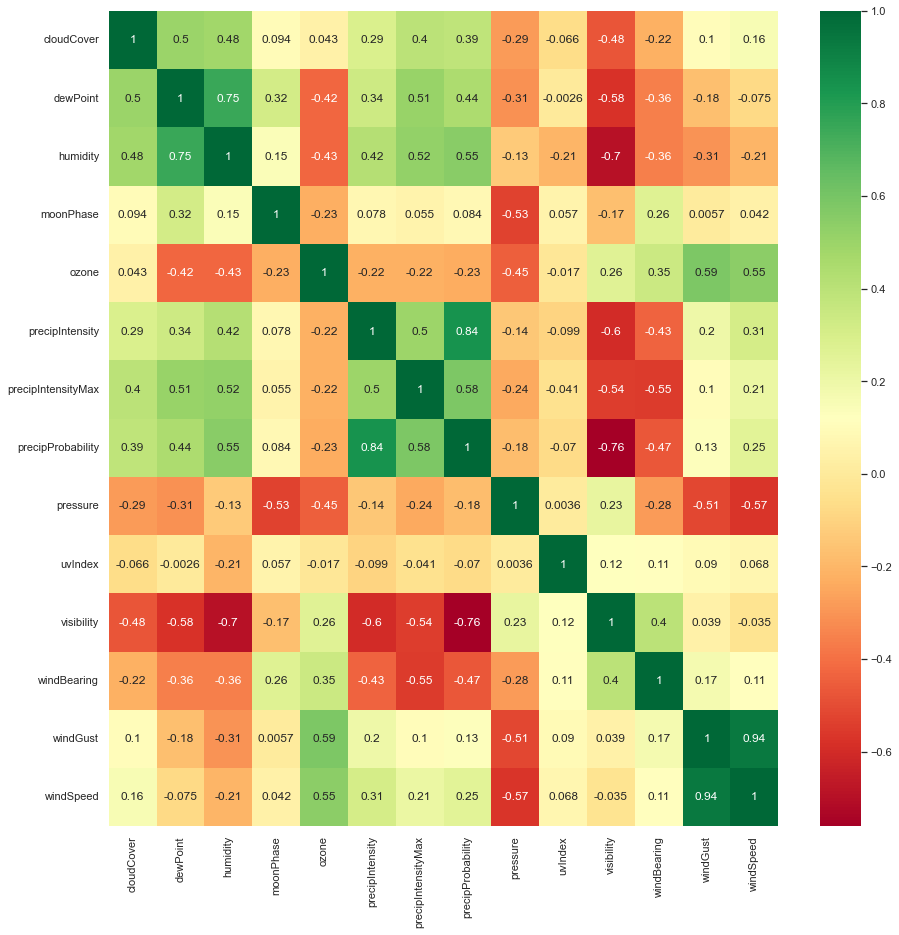

In [157]:
# Checking correlation between parameter alike
# Precipitation

Precipt = ['precipIntensity','precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex','ozone', 'moonPhase', 'precipIntensityMax']

# Heatmap
corrmat = X_train[Precipt].corr().sort_index()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

Based on correlation matrix above, We can see:
- dewpoint has high correlation with humidity
- preciptIntensity has high correlation with preciptProbability
- windGust has high correlation with windspeed

This high correlation could mean each input parameter shares the same meaning, Hence they share simmilarity.\
In this process I decide to `use humidity` over dewpoint, `use preciptIntensity` over preciptProbability, and `use windSpeed` over windGust

In [158]:
# Drop precipt-like input parameter

# Creating List
drop_precipt = ['precipProbability', 'windGust','dewPoint', 'precipIntensityMax']

X_train.drop(columns=drop_precipt, inplace=True)
X_test.drop(columns=drop_precipt, inplace=True)

I'll also utilize new feature created during `Cardinality` check which is `short_summary_new` and `icon_new.`\
I'll drop `short_summary`, `long_summary`, `icon` input parameter.\
Also I decide won't use `longitude`, `latitude`, and `moonPhase` input parameter because I felt it has nothing to do with `price estimation` process

In [159]:
# Drop `short_summary`, `long_summary`, `icon` input parameter

# Creating List
drop_sum = ['short_summary', 'long_summary', 'icon']

X_train.drop(columns=drop_sum , inplace=True)
X_test.drop(columns=drop_sum , inplace=True)

In [160]:
# Drop `longitude` and `latitude` input parameter

# Creating List
drop_cor = ['longitude', 'latitude', 'moonPhase']

X_train.drop(columns=drop_cor, inplace=True)
X_test.drop(columns=drop_cor , inplace=True)

Now, let's see our final input parameter correlation matrix.

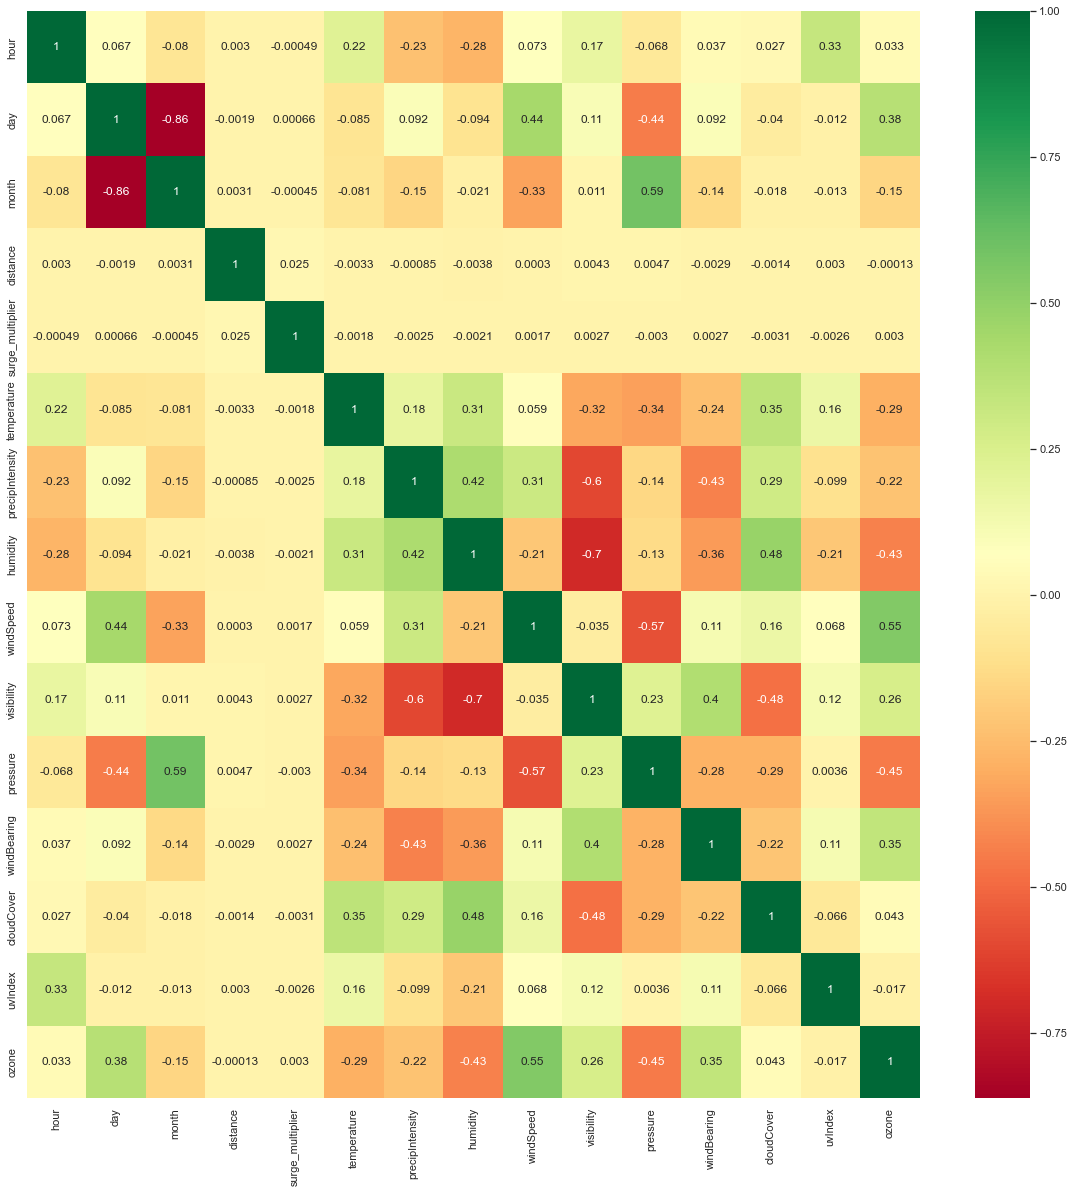

In [161]:
# Final Corellation Matrix

# Heatmap
corrmat = X_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(20,20))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

Next process will be `'Feature Scaling and Feature Encoding.'` Before go to the next process, I'll classify input parameter into different class based on its input.

They are:
- numerical_col = any input parameter that is numerical input
- categorical_col = any input parameter that is `categorical-non_ordinal` input
- categorical_hierarchy_col = any input parameter that is `categorical-ordinal` input

In [162]:
# List all columns
X_train.columns

Index(['hour', 'day', 'month', 'datetime', 'source', 'destination', 'cab_type',
       'name', 'distance', 'surge_multiplier', 'temperature',
       'precipIntensity', 'humidity', 'windSpeed', 'visibility', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'short_summary_new',
       'icon_new'],
      dtype='object')

In [163]:
# Classify input parameter based on input type

numerical_col = [
    'distance', 'surge_multiplier','temperature','precipIntensity', 'humidity', 
    'windSpeed', 'visibility', 'pressure','windBearing', 'cloudCover', 'ozone'
]

categorical_col = [
    'hour', 'day', 'month', 'source', 'destination', 
    'cab_type','short_summary_new', 'icon_new'
]

categorical_hierarchy_col = [
   'name', 'uvIndex'
]

In [164]:
# Splitting Dataset based on input type

X_train_num = X_train[numerical_col]
X_train_cat = X_train[categorical_col]
X_train_hier = X_train[categorical_hierarchy_col]

X_test_num = X_test[numerical_col]
X_test_cat = X_test[categorical_col]
X_test_hier = X_test[categorical_hierarchy_col]

### Feature Scaling

In this part of sub-process, I will scaled all numerical input parameter so that each input across each input parameter is well balanced.

Since I will use `Linear Regression` algorithm for my machine learning model, I'll utilize `StandardScaler` as my scaling method.

In [165]:
# Define the scaling method
scaler = StandardScaler()

# Train the data into scaler
# Use only data from `Train Set` for training
scaler.fit(X_train_num)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Feature Encoding

In this part of sub-process, I will encode the categorical input parameter  by using `OneHotEncoder` for both `'categorical_col'` and `'categorical_hierarchy_col'`

Note: I already try using `OrdinalEncoder` for  `'categorical_hierarchy_col'` but the result is not as good as using `OneHotEncoder`, Hence I decide to use only `OneHotEncoder` despite there is hierarchy in `'categorical_hierarchy_col'`

In [166]:
# Define the encoding method
encoder_1 = OneHotEncoder()

# Train the data into encoder
# Use only data from `Train Set` for training
encoder_1.fit(X_train_cat)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_cat_encoded = encoder_1.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder_1.transform(X_test_cat).toarray()

In [167]:
# Define the encoding method
encoder_2 = OneHotEncoder()

# Train the data into encoder
# Use only data from `Train Set` for training
encoder_2.fit(X_train_hier)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_hier_encoded = encoder_2.transform(X_train_hier).toarray()
X_test_hier_encoded = encoder_2.transform(X_test_hier).toarray()

### Concantenate Back Dataset

In this part of sub-process, I will concatenate `'numerical_col'` and `'categorical_col'` into one dataframe.
In this process there will be two kind of sets:
1. set#1 will contain `'categorical_col'` that is `OneHot` encoded only
2. set#2 will contain `'categorical_col'` that is combination of `OneHot` and `Ordinal` encode method

In [168]:
# Concatenate

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded, X_train_hier_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded, X_test_hier_encoded], axis=1)

In [169]:
# Check 1st variation
# Turn it into dataframe

df_X_train_final = pd.DataFrame(X_train_final)
df_X_train_final.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
390316,-0.660015,-0.158198,1.087573,-0.331162,-0.729421,-0.288523,0.573934,0.915475,-1.864981,-1.272761,-0.483056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
335072,-0.924381,-0.158198,-1.420724,-0.331162,0.786306,-1.006780,0.545095,0.382416,0.918234,-1.914112,-1.095182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
80900,0.256452,-0.158198,-1.637802,-0.331162,-2.172970,2.114142,0.588162,0.018629,1.019075,-1.551609,2.334152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
406789,-1.382614,2.456534,-0.210437,-0.331162,-0.296356,0.741190,0.588162,-0.842580,0.837561,-0.268909,1.188655,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
113227,-0.483772,-0.158198,-0.174753,-0.331162,-0.152001,0.706231,0.555477,-0.978443,0.777056,0.233017,1.303204,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
383407,-0.404462,-0.158198,0.259404,-0.331162,0.281064,1.821754,0.522793,-1.480320,0.293019,0.846483,0.372487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
109621,0.917366,-0.158198,-0.094464,-0.331162,-0.296356,0.293074,0.570858,-0.684444,0.746804,0.651289,2.266139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
285185,0.591315,-0.158198,0.103286,-0.331162,-1.018131,0.715765,0.587008,-0.315460,0.898066,-1.579494,0.787730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

## VI. Model Definition

### Algortihm : Linear Regression &  Elastic Net
Because my main objective is to create `price` prediction model on machine learning, and my dataset contains features and labels, I'm able to use `Linear Regression` as my machine learning algorithm to create my model.

In [170]:
# Model Definition
model_1 = LinearRegression()

For comparisson purpose I will try to use different linear regression model algorithm which is `Elastic Net.`\
Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve prediction result.\
We will see if there is any significance difference between `standard linear regression (ordinary least square)` and `Elastic Net` later in the process.

In [171]:
# Model Definition
model_2 = ElasticNet(alpha=0.5, l1_ratio=0.25)

In [172]:
# Model Definition
model_3 = ElasticNet(alpha=0.9, l1_ratio=0.75)

### Hyperparameter

For `Elastic Net` algorithm, I utilize two different hyperparameter which is `alpha and l1_ratio`.\
L1_ratio will affect the weight of penalty in l1 (Lasso) or l2 (Ridge) inside the model, higher l1_ration will result in higher penalty for l1 (Lasso) and vice vers,. While alpha is a constant that multiplies the penalty terms.

For this comparisson process, I randomly chose the value of alpha and l1_ratio.

### Model
Here is my initial `price prediction` model:

- Target Parameter (Label) : `price`
- Input Parameter (Features) : [`'hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name', 
                                'distance', 'surge_multiplier', 'temperature','precipIntensity', 'humidity', 'windSpeed', 'visibility', 
                                'pressure','windBearing', 'cloudCover', 'uvIndex', 'ozone', 'short_summary_new','icon_new'`]

This is only initial model, it may change in the future depends on my model evaluation result.


### Model Evaluation (Metrics)

Performance of a regression model must be reported as an error in those predictions.\
Since I try to predict `price`, I will calculate the error between actual `price` label in the dataset and `predicted price.`

I will use these error metrics for evaluating my model:
- MAE: mean absolute error
- MSE: mean squared error
- RMSE: root mean squared error
- MAPE: mean absolute percentage error
- R2 Score: r2 score

## VII. Model Training

In this part of process I will feed my model and train it to predict `price` value.

In [173]:
# Model Training 
model_1.fit(X_train_final, y_train)

LinearRegression()

In [174]:
# Model Training 
model_2.fit(X_train_final, y_train)

ElasticNet(alpha=0.5, l1_ratio=0.25)

In [175]:
# Model Training 
model_3.fit(X_train_final, y_train)

ElasticNet(alpha=0.9, l1_ratio=0.75)

In [176]:
# Prediction using `Train_Set` on 1st model
y_train_pred_1 = model_1.predict(X_train_final)

# Prediction using `Train_Set` on 2nd model
y_train_pred_2 = model_2.predict(X_train_final)

# Prediction using `Train_Set` on 3rd model
y_train_pred_3 = model_3.predict(X_train_final)

## VIII. Model Evaluation

In this part of process, I will try to evaluate the trained model and make conclusion out of it.

In [177]:
# Prediction using `Test_Set` on 1st model
y_test_pred_1 = model_1.predict(X_test_final)
y_test_pred_2 = model_2.predict(X_test_final)
y_test_pred_3 = model_3.predict(X_test_final)

# Result
print(y_test_pred_1)
print(y_test_pred_2)
print(y_test_pred_3)

[16.26049805  6.96362305 31.43920898 ...  9.14428711  7.47436523
 14.40576172]
[19.70490445 13.34134269 18.74155868 ... 16.98809205 13.38050307
 16.27304412]
[20.21581369 14.34640993 17.91893051 ... 17.615417   14.38252933
 15.97178328]


In [178]:
# Evaluation for training phase
print('==================== Train Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_1))
print('MSE:',mean_squared_error(y_train,y_train_pred_1))
print('RMSE:',mean_squared_error(y_train,y_train_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_1))
print('R-squared Score:',r2_score(y_train,y_train_pred_1))

print('==================== Train Results (model_2) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_2))
print('MSE:',mean_squared_error(y_train,y_train_pred_2))
print('RMSE:',mean_squared_error(y_train,y_train_pred_2,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_2))
print('R-squared Score:',r2_score(y_train,y_train_pred_2))

print('==================== Train Results (model_3) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_3))
print('MSE:',mean_squared_error(y_train,y_train_pred_3))
print('RMSE:',mean_squared_error(y_train,y_train_pred_3,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_3))
print('R-squared Score:',r2_score(y_train,y_train_pred_3))

==================== Train Results (model_1) ====================
MAE: 1.7467245287310837
MSE: 6.194150788097034
RMSE: 2.488805092428299
MAPE: 0.13190186301227338
R-squared Score: 0.9287302166777708
==================== Train Results (model_2) ====================
MAE: 6.069254789095783
MSE: 54.52265126845941
RMSE: 7.383945508226575
MAPE: 0.4961734908116126
R-squared Score: 0.37266339245022384
==================== Train Results (model_3) ====================
MAE: 6.704503752402973
MSE: 64.78328041689967
RMSE: 8.048806148547726
MAPE: 0.5527953464720939
R-squared Score: 0.2546047850355748


For comparing result between model, I will see the `R-squared Score` only. Based on the score I can say that my model is perform better using `standard linear regression` algorithm. It has  `R-squared Score` closer to 1.

In [179]:
# Evaluation for test phase
print('==================== Test Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_test,y_test_pred_1))
print('MSE:',mean_squared_error(y_test,y_test_pred_1))
print('RMSE:',mean_squared_error(y_test,y_test_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_test_pred_1))
print('R-squared Score:',r2_score(y_test,y_test_pred_1))

print('==================== Test Results (model_2) ====================')
print('MAE:',mean_absolute_error(y_test,y_test_pred_2))
print('MSE:',mean_squared_error(y_test,y_test_pred_2))
print('RMSE:',mean_squared_error(y_test,y_test_pred_2,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_test_pred_2))
print('R-squared Score:',r2_score(y_test, y_test_pred_2))

print('==================== Test Results (model_3) ====================')
print('MAE:',mean_absolute_error(y_test,y_test_pred_3))
print('MSE:',mean_squared_error(y_test,y_test_pred_3))
print('RMSE:',mean_squared_error(y_test,y_test_pred_3,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_test_pred_3))
print('R-squared Score:',r2_score(y_test,y_test_pred_3))

==================== Test Results (model_1) ====================
MAE: 1.7583236580375659
MSE: 6.241604401703335
RMSE: 2.4983203160730483
MAPE: 0.1330192251330266
R-squared Score: 0.9282938628597948
==================== Test Results (model_2) ====================
MAE: 6.086311423393765
MSE: 54.62722340818225
RMSE: 7.391023163823954
MAPE: 0.49766389327277893
R-squared Score: 0.37241982650698524
==================== Test Results (model_3) ====================
MAE: 6.722280947073032
MSE: 64.9153084709877
RMSE: 8.05700369064007
MAPE: 0.5543694379223295
R-squared Score: 0.25422604315501574


Evaluation results on test phase shows simmilar result with train phase.  Model using `standard linear regression` algorithm has  `R-squared Score` closer to 1 compared to other algorithm.\
Now let's focus on `standard linear regression` evaluation and check between training phase and test phase.

In [180]:
# Evaluation of chosen Model
print('==================== Train Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_1))
print('MSE:',mean_squared_error(y_train,y_train_pred_1))
print('RMSE:',mean_squared_error(y_train,y_train_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_1))
print('R-squared Score:',r2_score(y_train,y_train_pred_1))

print('==================== Test Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_test,y_test_pred_1))
print('MSE:',mean_squared_error(y_test,y_test_pred_1))
print('RMSE:',mean_squared_error(y_test,y_test_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_test_pred_1))
print('R-squared Score:',r2_score(y_test,y_test_pred_1))

print('==================== Difference ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_1) - mean_absolute_error(y_test,y_test_pred_1))
print('MSE:',mean_squared_error(y_train,y_train_pred_1) - mean_squared_error(y_test,y_test_pred_1))
print('RMSE:',mean_squared_error(y_train,y_train_pred_1,squared=False) - mean_squared_error(y_test,y_test_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_1) - mean_absolute_percentage_error(y_train,y_train_pred_1))
print('R-squared Score:',r2_score(y_train,y_train_pred_1) - r2_score(y_test,y_test_pred_1))

==================== Train Results (model_1) ====================
MAE: 1.7467245287310837
MSE: 6.194150788097034
RMSE: 2.488805092428299
MAPE: 0.13190186301227338
R-squared Score: 0.9287302166777708
==================== Test Results (model_1) ====================
MAE: 1.7583236580375659
MSE: 6.241604401703335
RMSE: 2.4983203160730483
MAPE: 0.1330192251330266
R-squared Score: 0.9282938628597948
==================== Difference ====================
MAE: -0.011599129306482103
MSE: -0.04745361360630085
RMSE: -0.009515223644749327
MAPE: 0.0
R-squared Score: 0.0004363538179760207


### Model Evaluation Interpretation

**Mean Absolute Error**
> On average, the prediction result and the actual result will differ `1.75` of prediction unit (in this case prediction unit is $).

**Mean Squared Error**
> MSE quite like the variance which explain the spread of predicted result compared to actual result 

**Root Mean Squared Error**
> RMSE quite like the standard deviation which explain the spread of predicted result compared to actual result 

**Mean Absolute Percentage Error**
> On average, the prediction result will differ as far as `0.0` percent from actual result.

**R-squared Score**
> R-squared shows values that close to 1, It indicates that my regression model fits the observed data.\
> From the result we can see that 92% of the data fits the regression model

**Difference**
>It can be seen that the results of the model evaluation on training and tests are not so different, I can conclude that my prediction results are `fit`

Since the best performed model is the original `Linear Regression` algorithm, I'll use it for further test on `Inference Set`

## IX. Model Inference
In this part of process, I will try to feed the machine learning model using the `Inference Set` and see how it perform.

Before feeding the set into the model, We need to do exact same process of `Missing value handling, Feature selection and engineering` process to the `Inference Set`

In [181]:
# List all entries with missing values
drop_list = inf_set[inf_set['price'].isnull()==1].index.to_list()

# Discard entries with missing value from the Inference Set
print('Entries before: ', len(inf_set))
inf_set.drop(drop_list, inplace=True)
print('Entries after: ', len(inf_set))

Entries before:  3071
Entries after:  2816


In [182]:
# Confirmation
inf_set.isnull().sum()

hour                       0
day                        0
month                      0
datetime                   0
source                     0
destination                0
cab_type                   0
name                       0
price                      0
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
short_summary              0
long_summary               0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
icon                       0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
ozone                      0
moonPhase     

It's confirmed that the `Inference Set` is free from any missing value.

Now Let's split the dataset

In [183]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = inf_set.drop(['price'], axis=1)

# y will be consist of target parameter only
y_inf = inf_set['price']

In [184]:
# Set same input parameter
col = []

for i in numerical_col:
    col.append(i)

for i in categorical_col:
    col.append(i)

for i in categorical_hierarchy_col:
    col.append(i)

X_inf = pd.DataFrame(X_inf[col])

In [185]:
# Splitting Dataset based on input type

X_inf_num = X_inf[numerical_col]
X_inf_cat = X_inf[categorical_col]
X_inf_hier = X_inf[categorical_hierarchy_col]

In [186]:
X_inf_cat

,hour,day,month,source,destination,cab_type,short_summary_new,icon_new
686860,11,26,11,North Station,South Station,Lyft,Foggy,Fog
314265,1,27,11,North Station,North End,Uber,Rain,Rain
442796,0,1,12,Haymarket Square,North Station,Lyft,Cloudy,Cloudy
521075,14,30,11,Back Bay,Northeastern University,Lyft,Clear,Clear
687341,15,26,11,Northeastern University,Financial District,Uber,Rain,Rain
...,...,...,...,...,...,...,...,...
379522,3,1,12,Back Bay,Fenway,Lyft,Cloudy,Cloudy
255987,11,28,11,North End,Beacon Hill,Uber,Cloudy,Cloudy
523396,10,14,12,Boston University,Financial District,Lyft,Cloudy,Cloudy
460319,17,27,11,Fenway,North Station,Lyft,Cloudy,Cloudy


After splitting the dataset, I will feature scaling and feature encoding the `inference set` so it has the same dataframe shape that is recognizeable by my machine learning model.

### Feature Scaling

In [187]:
# Transform the input value for each input parameter
X_inf_num_scaled = scaler.transform(X_inf_num)

### Feature Encoding

In [188]:
# Transform the input value for each input parameter
X_inf_cat_encoded = encoder_1.transform(X_inf_cat).toarray()

In [189]:
# Transform the input value for each input parameter
X_inf_hier_encoded = encoder_2.transform(X_inf_hier).toarray()

### Concatenate Dataset

In [190]:
# Concatenate

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_cat_encoded, X_inf_hier_encoded], axis=1)

In [191]:
# Check
# Turn it into dataframe first

df_X_inf_final = pd.DataFrame(X_inf_final)
df_X_inf_final.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102
1489,-1.021315,-0.158198,-0.582147,-0.331162,0.497596,-1.384978,0.533175,1.002338,-0.634719,-1.914112,-1.392295,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1802,-0.906756,-0.158198,0.794666,-0.070632,1.435903,-0.304414,-2.014665,-1.634001,0.071168,0.874368,0.333111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,0.617751,-0.158198,0.272785,-0.308831,1.291548,-0.886011,-2.081188,0.354946,-1.743972,0.874368,-0.561809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
802,0.133081,-0.158198,0.582048,2.765431,1.580258,0.130990,-2.240380,0.382416,-1.038084,0.874368,-1.342180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1084,-1.021315,-0.158198,-0.039451,-0.331162,-0.873776,-0.612692,0.573165,0.927353,1.271178,-1.244877,-1.245528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2158,-1.400239,-0.158198,0.549337,2.542119,1.147193,1.535723,-2.225383,-0.979928,-1.562458,0.874368,-0.980632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
776,0.573690,-0.158198,-1.118895,-0.331162,0.353241,-0.396580,0.477420,0.862020,1.059411,-0.882374,-1.213311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
804,-0.668827,-0.158198,1.184218,-0.033413,1.147193,-0.803380,0.166726,0.934035,0.202262,0.874368,-0.572548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,

After done preparing the dataframe, let's feed it into the model.

### Prediction

In [192]:
# Determines prediction result
y_inf_pred = model_1.predict(X_inf_final)

### Evaluation

In [193]:
print('==================== Inference Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_inf,y_inf_pred))
print('MSE:',mean_squared_error(y_inf,y_inf_pred))
print('RMSE:',mean_squared_error(y_inf,y_inf_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_inf,y_inf_pred))
print('R-squared Score:',r2_score(y_inf,y_inf_pred))

==================== Inference Results (model_1) ====================
MAE: 1.7913043282248757
MSE: 6.836510285311802
RMSE: 2.6146721181272046
MAPE: 0.13391474717281093
R-squared Score: 0.9224929015025581


For the Inference result, I'll just focus on `MAPE and R-squared Score`, I can say that my model works pretty well in predicting `price` using this dataset.

## X. Conclusion

In this process I will try to make conclusion based on my objectives on part `I.3 Objectives`

### Implement Linear Regression in Machine Learning model

On implementation I tried to use three different model and make comparisson between each model:

- model_1 = I used standard logistic regression model
- model_2 = I used elastic net with alpha=0.5 and l1_ratio=0.25
- model_3 = I used elastic net with alpha=0.9 and l1_ratio=0.75

and for model evaluation process I used:
- MAE: mean absolute error
- MSE: mean squared error
- RMSE: root mean squared error
- MAPE: mean absolute percentage error
- R2 Score: r2 score

During the comparisson process, turn out mode_1 that using standard logistic regression algorithm performed the best out of three.\
Here is the comparrison result.

In [194]:
# Evaluation for training phase
print('==================== Train Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_1))
print('MSE:',mean_squared_error(y_train,y_train_pred_1))
print('RMSE:',mean_squared_error(y_train,y_train_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_1))
print('R-squared Score:',r2_score(y_train,y_train_pred_1))

print('==================== Train Results (model_2) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_2))
print('MSE:',mean_squared_error(y_train,y_train_pred_2))
print('RMSE:',mean_squared_error(y_train,y_train_pred_2,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_2))
print('R-squared Score:',r2_score(y_train,y_train_pred_2))

print('==================== Train Results (model_3) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_3))
print('MSE:',mean_squared_error(y_train,y_train_pred_3))
print('RMSE:',mean_squared_error(y_train,y_train_pred_3,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_3))
print('R-squared Score:',r2_score(y_train,y_train_pred_3))

==================== Train Results (model_1) ====================
MAE: 1.7467245287310837
MSE: 6.194150788097034
RMSE: 2.488805092428299
MAPE: 0.13190186301227338
R-squared Score: 0.9287302166777708
==================== Train Results (model_2) ====================
MAE: 6.069254789095783
MSE: 54.52265126845941
RMSE: 7.383945508226575
MAPE: 0.4961734908116126
R-squared Score: 0.37266339245022384
==================== Train Results (model_3) ====================
MAE: 6.704503752402973
MSE: 64.78328041689967
RMSE: 8.048806148547726
MAPE: 0.5527953464720939
R-squared Score: 0.2546047850355748


Because model_1 is performed better out of three, I decided to use model_1 as my main model.
Here is the performance comparrison between training phase and test phase.

In [195]:
# Evaluation of chosen Model
print('==================== Train Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_1))
print('MSE:',mean_squared_error(y_train,y_train_pred_1))
print('RMSE:',mean_squared_error(y_train,y_train_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_1))
print('R-squared Score:',r2_score(y_train,y_train_pred_1))

print('==================== Test Results (model_1) ====================')
print('MAE:',mean_absolute_error(y_test,y_test_pred_1))
print('MSE:',mean_squared_error(y_test,y_test_pred_1))
print('RMSE:',mean_squared_error(y_test,y_test_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_test,y_test_pred_1))
print('R-squared Score:',r2_score(y_test,y_test_pred_1))

print('==================== Difference (model_1) ====================')
print('MAE:',mean_absolute_error(y_train,y_train_pred_1) - mean_absolute_error(y_test,y_test_pred_1))
print('MSE:',mean_squared_error(y_train,y_train_pred_1) - mean_squared_error(y_test,y_test_pred_1))
print('RMSE:',mean_squared_error(y_train,y_train_pred_1,squared=False) - mean_squared_error(y_test,y_test_pred_1,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_train,y_train_pred_1) - mean_absolute_percentage_error(y_train,y_train_pred_1))
print('R-squared Score:',r2_score(y_train,y_train_pred_1) - r2_score(y_test,y_test_pred_1))

==================== Train Results (model_1) ====================
MAE: 1.7467245287310837
MSE: 6.194150788097034
RMSE: 2.488805092428299
MAPE: 0.13190186301227338
R-squared Score: 0.9287302166777708
==================== Test Results (model_1) ====================
MAE: 1.7583236580375659
MSE: 6.241604401703335
RMSE: 2.4983203160730483
MAPE: 0.1330192251330266
R-squared Score: 0.9282938628597948
==================== Difference (model_1) ====================
MAE: -0.011599129306482103
MSE: -0.04745361360630085
RMSE: -0.009515223644749327
MAPE: 0.0
R-squared Score: 0.0004363538179760207


Model_1 has R-squared score close to 1 which indicates that the regression model fits the observed data.

### Predict Using Trained Model

Chosen Model_1 then used to make prediction from inference set and this is its performance result.

In [196]:
# Original result
y_inf.values

array([27.5,  6.5,  9. , ..., 26. ,  3. , 27. ])

In [197]:
# Prediction result
y_inf_pred

array([31.4440918 ,  5.51904297, 10.45898438, ..., 24.05639648,
        9.07885742, 31.66137695])

In [198]:
print('==================== Inference Results ====================')
print('MAE:',mean_absolute_error(y_inf,y_inf_pred))
print('MSE:',mean_squared_error(y_inf,y_inf_pred))
print('RMSE:',mean_squared_error(y_inf,y_inf_pred,squared=False))
print('MAPE:',mean_absolute_percentage_error(y_inf,y_inf_pred))
print('R-squared Score:',r2_score(y_inf,y_inf_pred))

==================== Inference Results ====================
MAE: 1.7913043282248757
MSE: 6.836510285311802
RMSE: 2.6146721181272046
MAPE: 0.13391474717281093
R-squared Score: 0.9224929015025581


The result still shows good performance, by looking at `MAPE and R-squared Score`, I can say that my model works pretty well in predicting `price` using this dataset.